In [1]:
# import necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
import yfinance as yf
warnings.filterwarnings('ignore')

In [2]:
# import the closing price data of the Ultratech Cement stock for the period of 5 years -
# from 24th march 2018 to 24th march 2023

import pandas_datareader.data as web

start = datetime.datetime(2018, 3, 24)
end = datetime.datetime(2023, 3, 24)

ultratech_df = yf.download("ULTRACEMCO.NS", start="2018-03-24", end="2023-03-24")


[*********************100%%**********************]  1 of 1 completed


In [3]:
ultratech_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-26,3863.000000,3970.000000,3826.199951,3950.000000,3858.041748,156418
2018-03-27,3949.500000,3990.050049,3923.000000,3978.600098,3885.975586,106468
2018-03-28,3974.899902,3974.899902,3923.000000,3950.000000,3858.041748,464340
2018-04-02,4123.000000,4123.000000,3923.050049,3978.500000,3885.877930,303869
2018-04-03,3967.000000,3991.600098,3914.500000,3951.199951,3859.213867,240321
...,...,...,...,...,...,...
2023-03-17,7159.149902,7308.899902,7159.149902,7289.950195,7256.783691,383505
2023-03-20,7275.000000,7284.399902,7098.000000,7243.200195,7210.246582,520041
2023-03-21,7243.000000,7360.000000,7237.100098,7352.750000,7319.297852,350524


In [4]:
ultratech_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
ultratech_df.shape

(1236, 6)

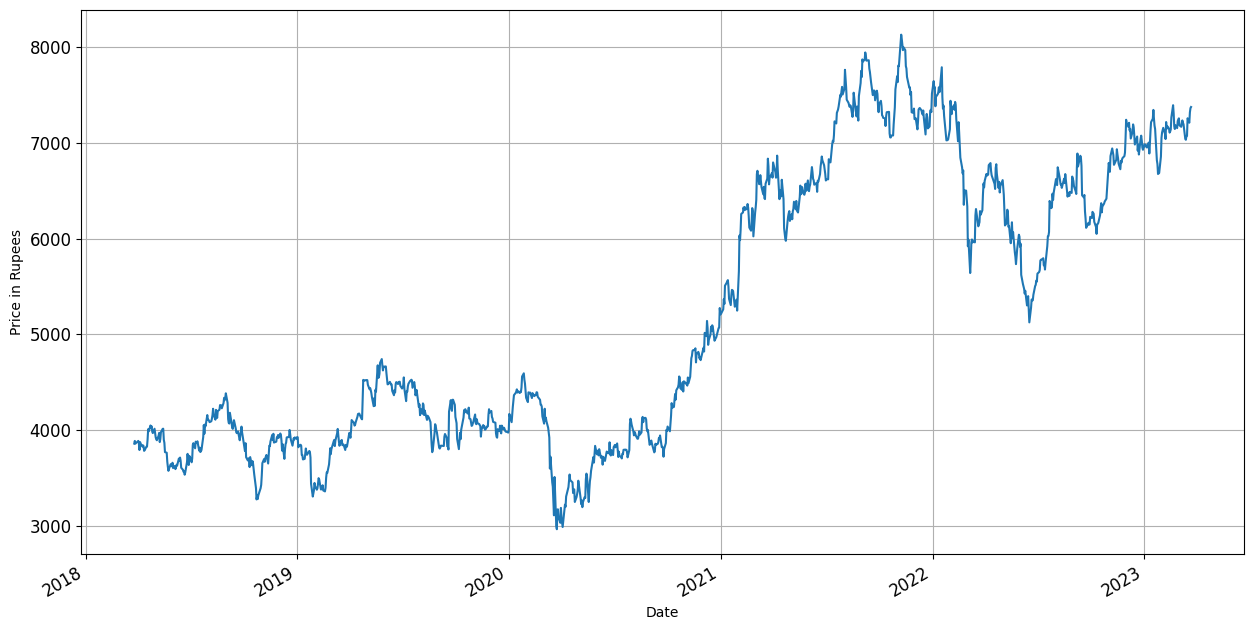

In [6]:
# observing general price variation of the closing price for the give period
ultratech_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)
plt.grid()
plt.ylabel('Price in Rupees')
plt.show()

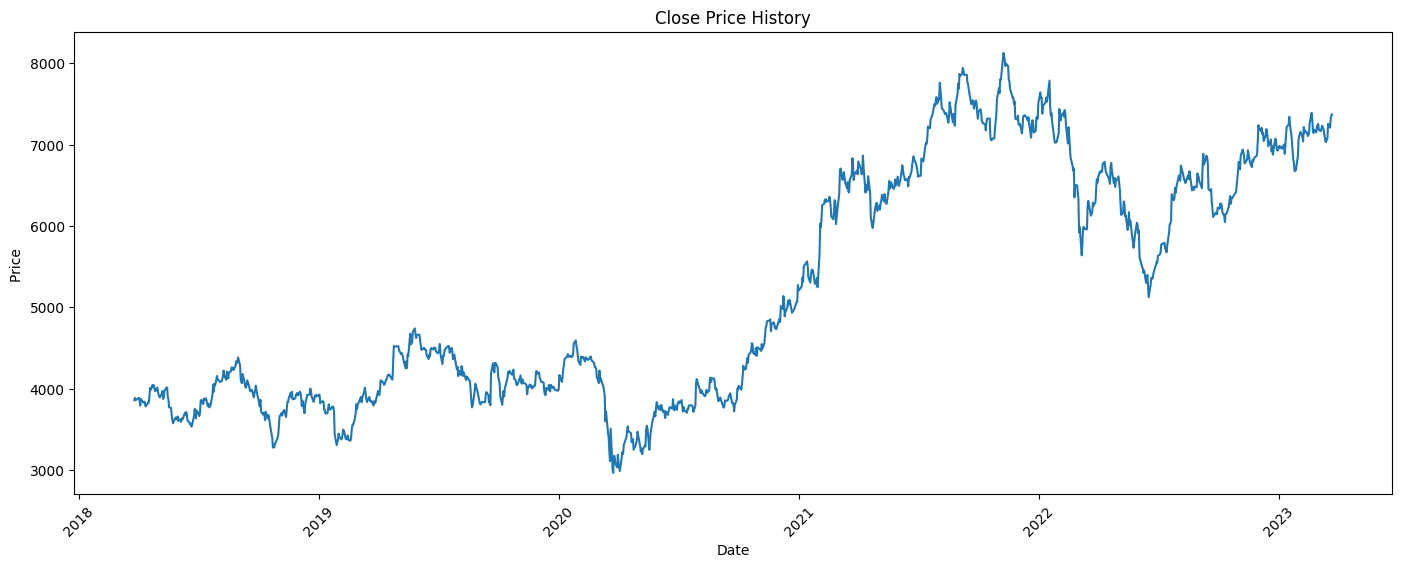

In [7]:
#Visualize the Stock Price
plt.figure(figsize = (17, 6))
plt.plot(ultratech_df['Adj Close'], label = 'Close')
plt.xticks(rotation = 45)
plt.title("Close Price History")
plt.xlabel('Date')
plt.ylabel("Price ")
plt.show()

In [8]:
#Calculate the MACD and signal line
#Calculate the short term exponential moving average (EMA)
ShortEMA = ultratech_df['Adj Close'].ewm(span=12, adjust = False).mean()
#Calculate the long term exponential moving average (EMA)
LongEMA = ultratech_df['Adj Close'].ewm(span=26, adjust=False).mean()
#Calculate the MACD Line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span = 9, adjust=False).mean()

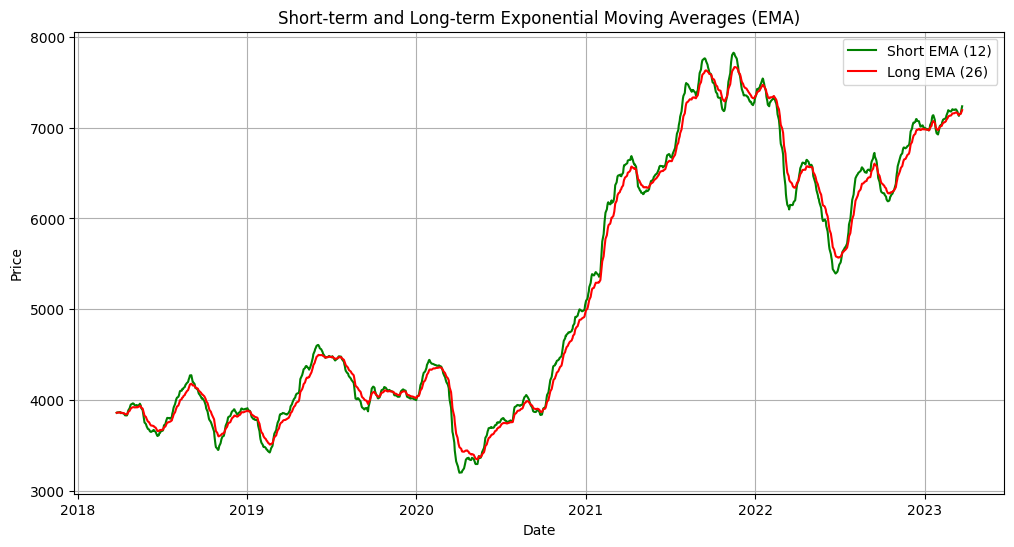

In [9]:
# Create a new figure
plt.figure(figsize=(12, 6))

# Plot the Adjusted Close Prices
#plt.plot(ultratech_df.index, ultratech_df['Adj Close'], label='Adj Close', color='blue')

# Plot the Short-term EMA
plt.plot(ShortEMA.index, ShortEMA, label='Short EMA (12)', color='green')

# Plot the Long-term EMA
plt.plot(LongEMA.index, LongEMA, label='Long EMA (26)', color='red')

# You can also plot the MACD and signal line for reference
# plt.plot(MACD.index, MACD, label='MACD', color='purple')
# plt.plot(signal.index, signal, label='Signal', color='orange')

plt.legend()
plt.title('Short-term and Long-term Exponential Moving Averages (EMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


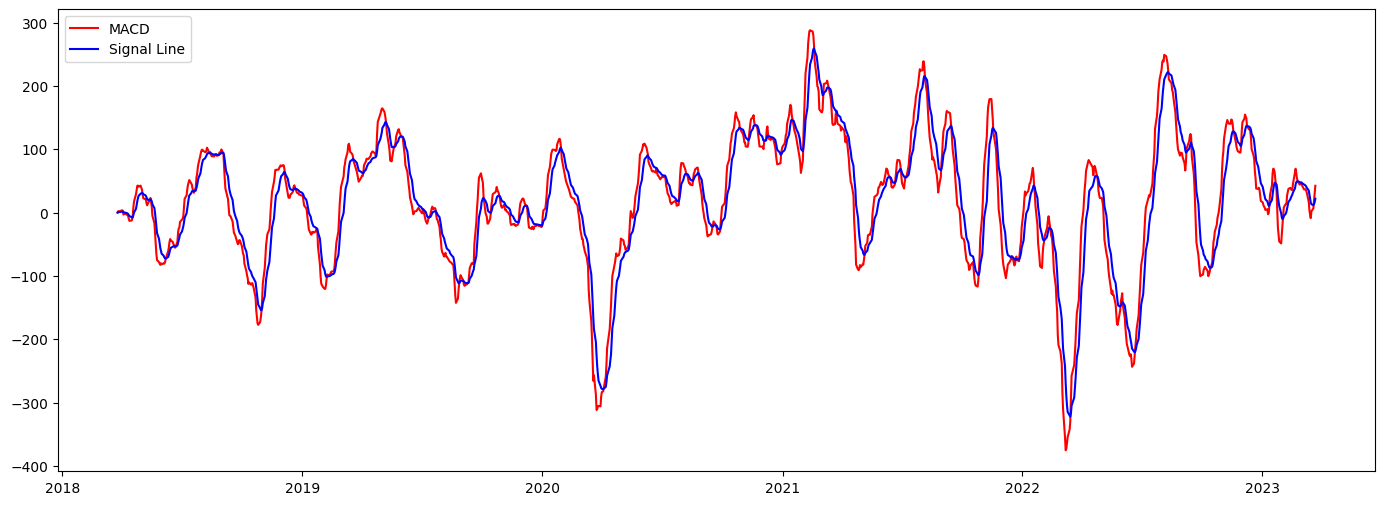

In [10]:
#plot the figure
plt.figure(figsize=(17,6))
plt.plot(ultratech_df.index, MACD, label = 'MACD', color = 'red')
plt.plot(ultratech_df.index, signal, label='Signal Line', color = 'blue')
plt.legend(loc = 'upper left')
plt.show()

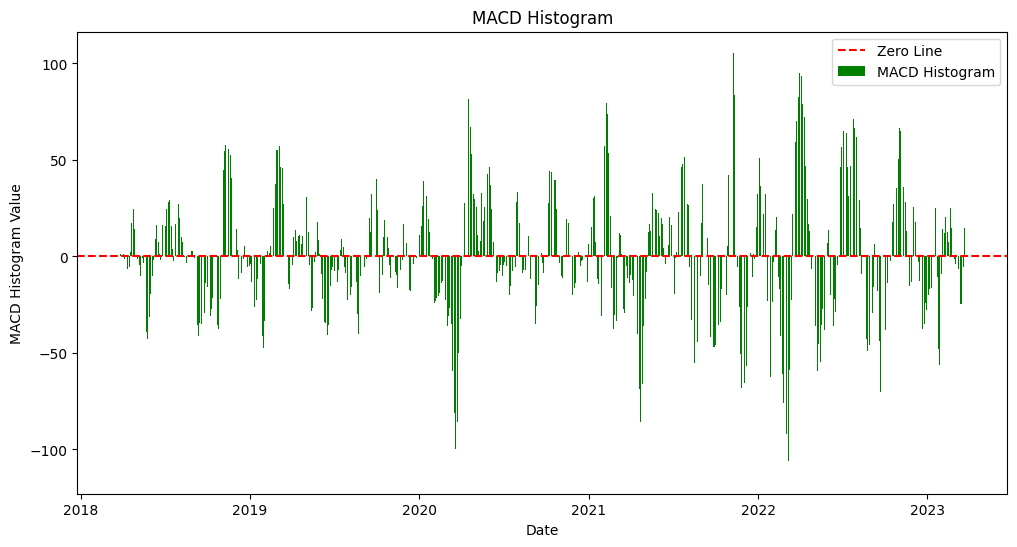

In [11]:


# Assuming you have already calculated ShortEMA, LongEMA, MACD, and signal as mentioned in your code

# Calculate the MACD histogram
MACD_histogram = MACD - signal

# Create a DataFrame to hold the MACD and its histogram
macd_data = pd.DataFrame({'MACD': MACD, 'MACD Signal': signal, 'MACD Histogram': MACD_histogram})

# Plot the MACD Histogram
plt.figure(figsize=(12, 6))
plt.bar(macd_data.index, macd_data['MACD Histogram'], color='g', label='MACD Histogram')
plt.axhline(0, color='r', linestyle='--', label='Zero Line')
plt.legend()
plt.title('MACD Histogram')
plt.xlabel('Date')
plt.ylabel('MACD Histogram Value')
plt.show()


In [12]:
ultratech_df['MACD'] = MACD
ultratech_df['Signal Line'] = signal

ultratech_df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2018-03-26,3863.000000,3970.000000,3826.199951,3950.000000,3858.041748,156418,0.000000,0.000000
2018-03-27,3949.500000,3990.050049,3923.000000,3978.600098,3885.975586,106468,2.228340,0.445668
2018-03-28,3974.899902,3974.899902,3923.000000,3950.000000,3858.041748,464340,1.720457,0.700626
2018-04-02,4123.000000,4123.000000,3923.050049,3978.500000,3885.877930,303869,3.523486,1.265198
2018-04-03,3967.000000,3991.600098,3914.500000,3951.199951,3859.213867,240321,2.768914,1.565941
...,...,...,...,...,...,...,...,...
2023-03-17,7159.149902,7308.899902,7159.149902,7289.950195,7256.783691,383505,1.879597,13.070376
2023-03-20,7275.000000,7284.399902,7098.000000,7243.200195,7210.246582,520041,6.525036,11.761308
2023-03-21,7243.000000,7360.000000,7237.100098,7352.750000,7319.297852,350524,18.789511,13.166948


In [13]:
#Create a signal to when to buy and sell an assert
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy, Sell)

In [14]:
#Create buy and sell column
a = buy_sell(ultratech_df)
ultratech_df['Buy_Signal_Price'] = a[0]
ultratech_df['Sell_Signal_Price'] = a[1]


In [15]:
ultratech_df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2018-03-26,3863.000000,3970.000000,3826.199951,3950.000000,3858.041748,156418,0.000000,0.000000,NaN,NaN
2018-03-27,3949.500000,3990.050049,3923.000000,3978.600098,3885.975586,106468,2.228340,0.445668,3978.600098,NaN
2018-03-28,3974.899902,3974.899902,3923.000000,3950.000000,3858.041748,464340,1.720457,0.700626,NaN,NaN
2018-04-02,4123.000000,4123.000000,3923.050049,3978.500000,3885.877930,303869,3.523486,1.265198,NaN,NaN
2018-04-03,3967.000000,3991.600098,3914.500000,3951.199951,3859.213867,240321,2.768914,1.565941,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-03-17,7159.149902,7308.899902,7159.149902,7289.950195,7256.783691,383505,1.879597,13.070376,NaN,NaN
2023-03-20,7275.000000,7284.399902,7098.000000,7243.200195,7210.246582,520041,6.525036,11.761308,NaN,NaN
2023-03-21,7243.000000,7360.000000,7237.100098,7352.750000,7319.297852,350524,18.789511,13.166948,7352.750000,NaN


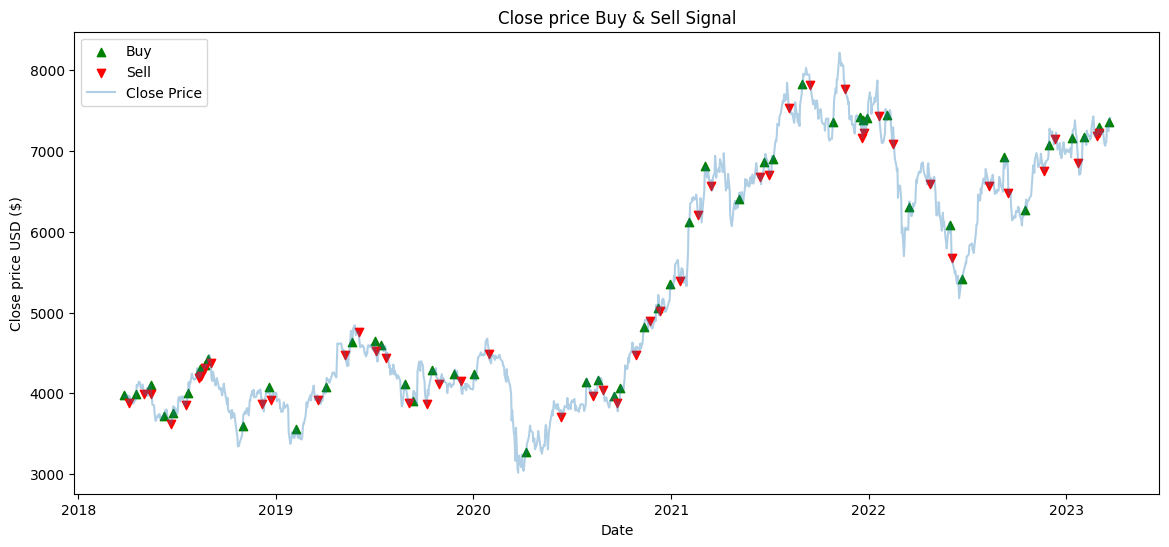

In [16]:
#Visualize the buy and sell signal

plt.figure(figsize=(14,6))
plt.scatter(ultratech_df.index, ultratech_df['Buy_Signal_Price'], color = 'green', label='Buy', marker='^', alpha=1)
plt.scatter(ultratech_df.index, ultratech_df['Sell_Signal_Price'], color = 'red', label='Sell', marker='v', alpha=1)
plt.plot(ultratech_df['Close'], label='Close Price', alpha=0.35)
plt.title('Close price Buy & Sell Signal')
plt.xlabel("Date")
plt.ylabel("Close price USD ($)")
plt.legend(loc='upper left')
plt.show()

In [17]:
# Calculate daily returns based on the signals
ultratech_df['Daily_Return'] = ultratech_df['Adj Close'].pct_change() * ultratech_df['Signal Line'].shift(1)
ultratech_df['Daily_Return'] = ultratech_df['Adj Close'].pct_change() * ultratech_df['Signal Line'].shift(1)

# Calculate the cumulative returns
ultratech_df['Cumulative_Return'] = (1 + ultratech_df['Daily_Return']).cumprod()

ultratech_df['trade_return']=ultratech_df['Daily_Return']*ultratech_df['Adj Close']*100

In [18]:
print(ultratech_df[['Adj Close', 'Signal Line', 'Daily_Return', 'Cumulative_Return','trade_return']])

              Adj Close  Signal Line  Daily_Return  Cumulative_Return  \
Date                                                                    
2018-03-26  3858.041748     0.000000           NaN                NaN   
2018-03-27  3885.975586     0.445668      0.000000       1.000000e+00   
2018-03-28  3858.041748     0.700626     -0.003204       9.967964e-01   
2018-04-02  3885.877930     1.265198      0.005055       1.001835e+00   
2018-04-03  3859.213867     1.565941     -0.008682       9.931378e-01   
...                 ...          ...           ...                ...   
2023-03-17  7256.783691    13.070376      0.413978       5.244040e-17   
2023-03-20  7210.246582    11.761308     -0.083819       4.804489e-17   
2023-03-21  7319.297852    13.166948      0.177884       5.659129e-17   
2023-03-22  7362.998047    16.867631      0.078614       6.104015e-17   
2023-03-23  7374.246582    21.953824      0.025769       6.261309e-17   

             trade_return  
Date                  

In [19]:
# Calculating benchmark return
initial_index = ultratech_df['Adj Close'].iloc[0]
final_index = ultratech_df['Adj Close'].iloc[-1]
benchmark_return = ((final_index - initial_index)/initial_index)*100
benchmark_return

91.13962636004253

In [20]:
# calculating portfolio value
initial_investment = 100000
initial_price = ultratech_df['Adj Close'].iloc[0]
no_of_shares_held = initial_investment / initial_price
ultratech_df['portfolio_value'] = no_of_shares_held * ultratech_df['Adj Close']
no_of_shares_held
ultratech_df['portfolio_value']

Date
2018-03-26    100000.000000
2018-03-27    100724.041877
2018-03-28    100000.000000
2018-04-02    100721.510638
2018-04-03    100030.381194
                  ...      
2023-03-17    188095.001696
2023-03-20    186888.765153
2023-03-21    189715.361563
2023-03-22    190848.065618
2023-03-23    191139.626360
Name: portfolio_value, Length: 1236, dtype: float64

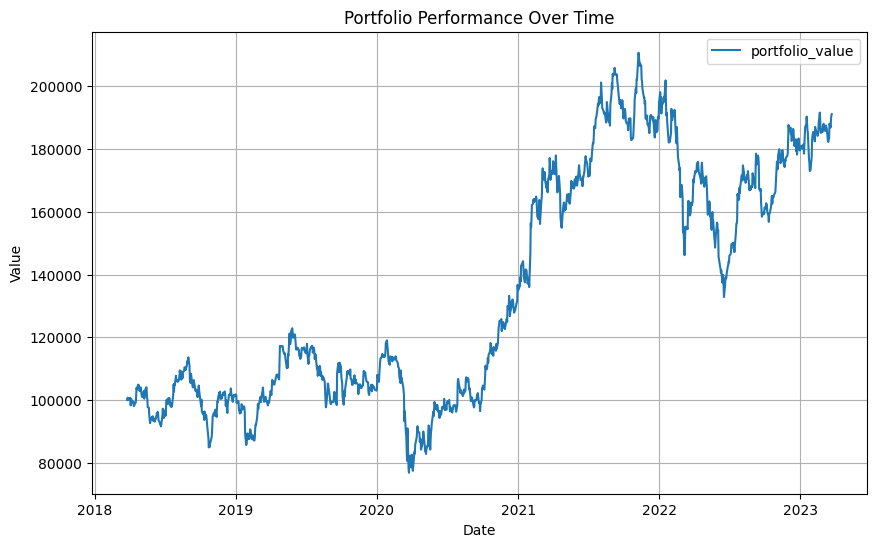

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(ultratech_df.index, ultratech_df['portfolio_value'], label='portfolio_value')
plt.title('Portfolio Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


In [22]:
# Get the stock returns of df
ultratech_df['stock_returns'] = ultratech_df['Close'].pct_change()
ultratech_df.dropna(subset=['stock_returns'], inplace=True)
ultratech_df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price,Daily_Return,Cumulative_Return,trade_return,portfolio_value,stock_returns
Date,,,,,,,,,,,,,,,
2018-03-27,3949.500000,3990.050049,3923.000000,3978.600098,3885.975586,106468,2.228340,0.445668,3978.600098,NaN,0.000000,1.000000e+00,0.000000,100724.041877,0.007241
2018-03-28,3974.899902,3974.899902,3923.000000,3950.000000,3858.041748,464340,1.720457,0.700626,NaN,NaN,-0.003204,9.967964e-01,-1235.972997,100000.000000,-0.007188
2018-04-02,4123.000000,4123.000000,3923.050049,3978.500000,3885.877930,303869,3.523486,1.265198,NaN,NaN,0.005055,1.001835e+00,1964.346020,100721.510638,0.007215
2018-04-03,3967.000000,3991.600098,3914.500000,3951.199951,3859.213867,240321,2.768914,1.565941,NaN,NaN,-0.008682,9.931378e-01,-3350.382661,100030.381194,-0.006862
2018-04-04,3952.000000,3974.949951,3872.600098,3881.300049,3790.940918,177225,-3.300105,0.592732,NaN,3881.300049,-0.027703,9.656250e-01,-10502.004736,98260.754174,-0.017691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-17,7159.149902,7308.899902,7159.149902,7289.950195,7256.783691,383505,1.879597,13.070376,NaN,NaN,0.413978,5.244040e-17,300414.919062,188095.001696,0.026089
2023-03-20,7275.000000,7284.399902,7098.000000,7243.200195,7210.246582,520041,6.525036,11.761308,NaN,NaN,-0.083819,4.804489e-17,-60435.679572,186888.765153,-0.006413
2023-03-21,7243.000000,7360.000000,7237.100098,7352.750000,7319.297852,350524,18.789511,13.166948,7352.750000,NaN,0.177884,5.659129e-17,130198.396702,189715.361563,0.015125


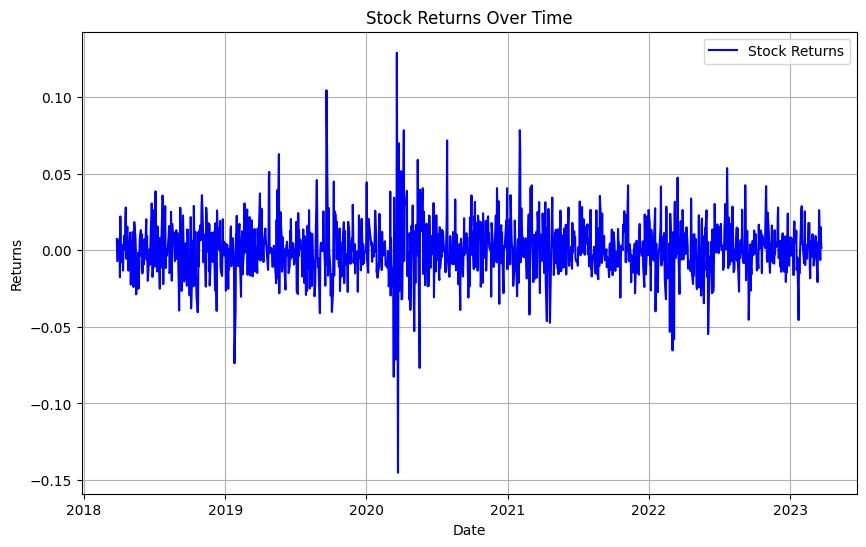

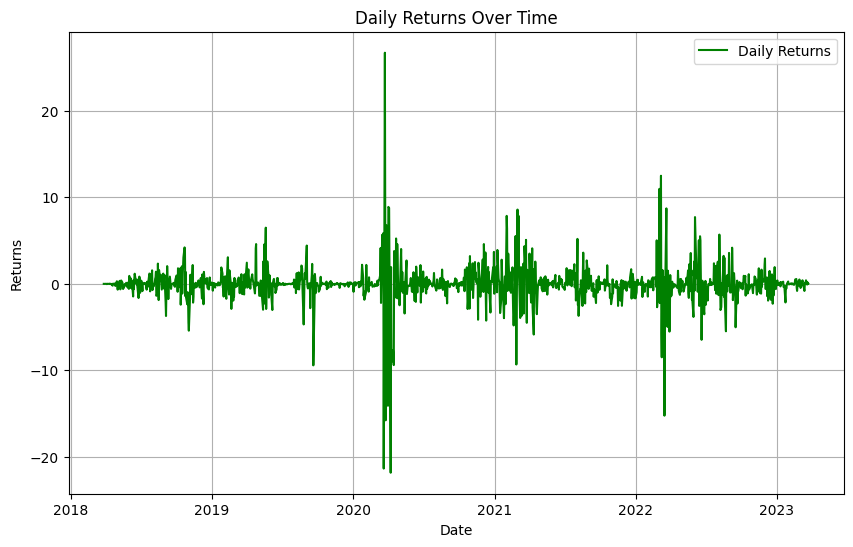

In [23]:

# Plot stock returns in graph
plt.figure(figsize=(10, 6))
plt.plot(ultratech_df.index, ultratech_df['stock_returns'], label='Stock Returns', color='blue')
plt.title('Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid()
plt.show()

# Plot daily returns in graph
plt.figure(figsize=(10, 6))
plt.plot(ultratech_df.index, ultratech_df['Daily_Return'], label='Daily Returns', color='green')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid()
plt.show()


In [24]:
# profit loss count and value
profit_count = sum(1 for result in ultratech_df['trade_return'] if result > 0)
loss_count = sum(1 for result in ultratech_df['trade_return'] if result < 0)
largest_profit_trade = ultratech_df['Daily_Return'].max()
largest_loss_trade = ultratech_df['Daily_Return'].min()

total_profit = sum(result for result in ultratech_df['trade_return'] if result > 0)
total_loss = sum(result for result in ultratech_df['trade_return'] if result < 0)
# Calculate the average of daily returns
avg_daily_return = ultratech_df['Daily_Return'].mean()

# Calculate the standard deviation of portfolio values
portfolio_volatility = ultratech_df['portfolio_value'].std()

print("mean",avg_daily_return)
print("std",portfolio_volatility)
print("Win ratio:", profit_count / len(ultratech_df['trade_return']))
print("Total number of trades:", len(ultratech_df['trade_return']))
print("Number of profitable trades:", profit_count)
print("Number of losing trades:", loss_count)
print(f"Largest profit making trade: {largest_profit_trade}")
print(f"Largest Loss-making Trade:  {largest_loss_trade}")
print("Total profit:", total_profit)
print("Total loss:", total_loss)
print("end portfolio,:",ultratech_df['portfolio_value'])

mean -0.026804266602567815
std 37454.18075109667
Win ratio: 0.47530364372469636
Total number of trades: 1235
Number of profitable trades: 587
Number of losing trades: 647
Largest profit making trade: 26.715903024270006
Largest Loss-making Trade:  -21.828769932362192
Total profit: 338455184.87942624
Total loss: -357489114.49040836
end portfolio,: Date
2018-03-27    100724.041877
2018-03-28    100000.000000
2018-04-02    100721.510638
2018-04-03    100030.381194
2018-04-04     98260.754174
                  ...      
2023-03-17    188095.001696
2023-03-20    186888.765153
2023-03-21    189715.361563
2023-03-22    190848.065618
2023-03-23    191139.626360
Name: portfolio_value, Length: 1235, dtype: float64


In [25]:
#strategy return
ending_value=ultratech_df['portfolio_value'][-1]
beginning_value=ultratech_df['portfolio_value'][0]
strategy_return = (ending_value - beginning_value) / beginning_value
strategy_return=strategy_return*100

In [26]:
strategy_return

89.76564363186026

In [27]:
#benchmark return
ending_value=ultratech_df['Adj Close'].iloc[-1]
beginning_value=ultratech_df['Adj Close'].iloc[0]
benchmark_return = (ending_value - beginning_value) / beginning_value
benchmark_return=benchmark_return*100
# Calculate the annualized returns
trading_days= 252
annualized_return = (1 + strategy_return) ** (trading_days / len(ultratech_df.index)) - 1
print(f"Annualized Return: {annualized_return:.2%}")

Annualized Return: 150.91%


In [28]:
print("benchmark returns:",benchmark_return)

benchmark returns: 89.76564363186026


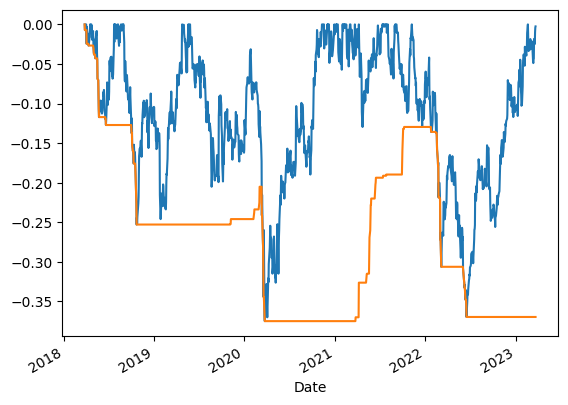

In [29]:
window = 252

# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
Roll_Max = ultratech_df['Adj Close'].rolling(window, min_periods=1).max()
Daily_Drawdown = ultratech_df['Adj Close']/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()

# Plot the results
Max_Daily_Drawdown
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()
plt.show()

In [30]:
Roll_Max = ultratech_df['Adj Close'].cummax()
Daily_Drawdown = ultratech_df['Adj Close']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.cummin()

In [31]:
print(Max_Daily_Drawdown)

Date
2018-03-27    0.000000
2018-03-28   -0.007188
2018-04-02   -0.007188
2018-04-03   -0.007188
2018-04-04   -0.024456
                ...   
2023-03-17   -0.374963
2023-03-20   -0.374963
2023-03-21   -0.374963
2023-03-22   -0.374963
2023-03-23   -0.374963
Name: Adj Close, Length: 1235, dtype: float64


In [32]:
minimum_max_daily_drawdown = Max_Daily_Drawdown.min()

In [33]:
print(minimum_max_daily_drawdown)

-0.3749631042939907


In [34]:
minimum_max_daily_drawdown_percentage = minimum_max_daily_drawdown * 100

print("Minimum Max Daily Drawdown in Percentage:", minimum_max_daily_drawdown_percentage, "%")

Minimum Max Daily Drawdown in Percentage: -37.496310429399074 %


In [35]:

# Assuming you have returns data in the 'Daily_Return' column of 'ultratech_df'
returns = ultratech_df['Daily_Return']

# Calculate mean log returns
mean_log_returns = np.log(returns + 1).mean()

# Calculate mean returns
mean_returns = np.exp(mean_log_returns) - 1

# Calculate the standard deviation of returns
std = returns.std()

# Calculate the Sharpe ratio
sharpe_ratio = mean_returns / std * np.sqrt(252)  # Assuming 252 trading days in a year


In [36]:
print(sharpe_ratio)

0.3467585043085922


In [37]:
ultratech_df.to_csv('Technical.csv')